In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yaml
from scipy.misc import imread

In [20]:
data_dir = '/media/michael/Engage/data/butterflies/web_scraping/ispot/sightings/'
yaml_name = 'butterflies.yaml'

In [21]:
butterflies = yaml.load(open(data_dir + '../' + yaml_name))

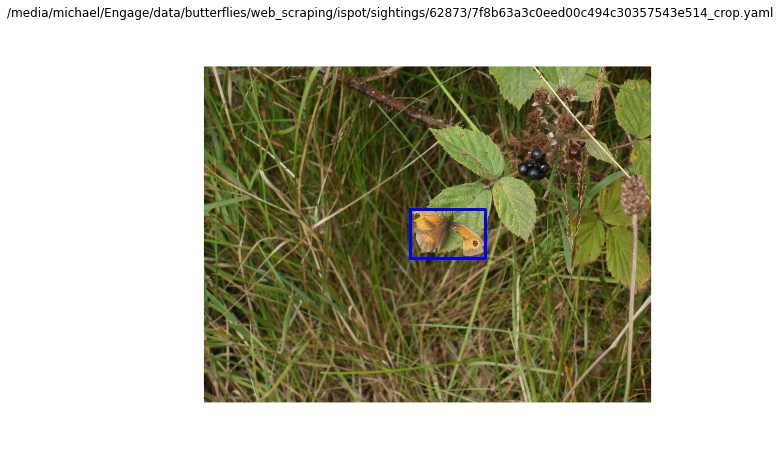

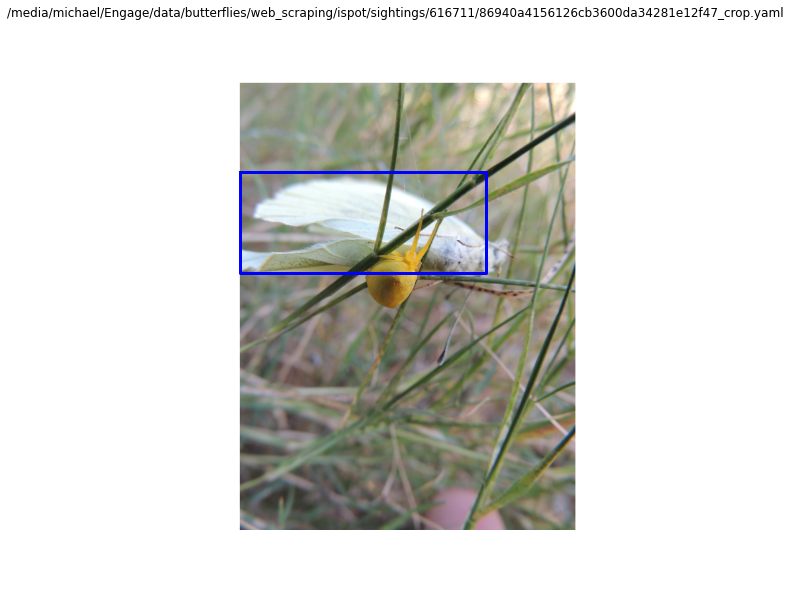

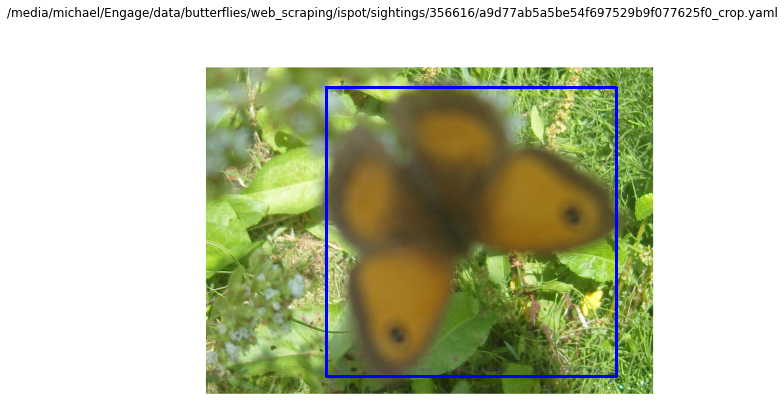

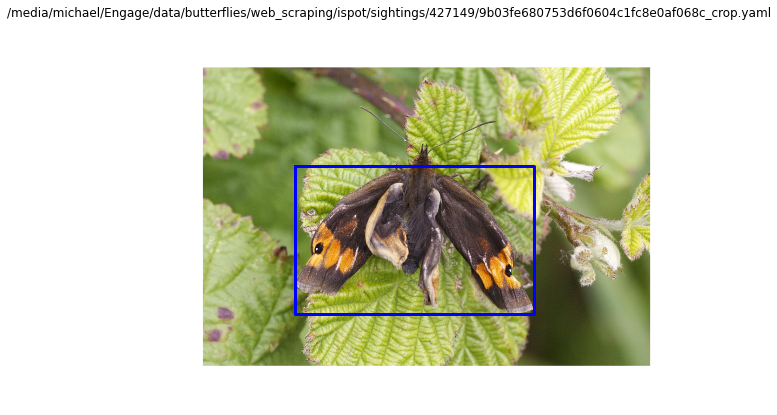

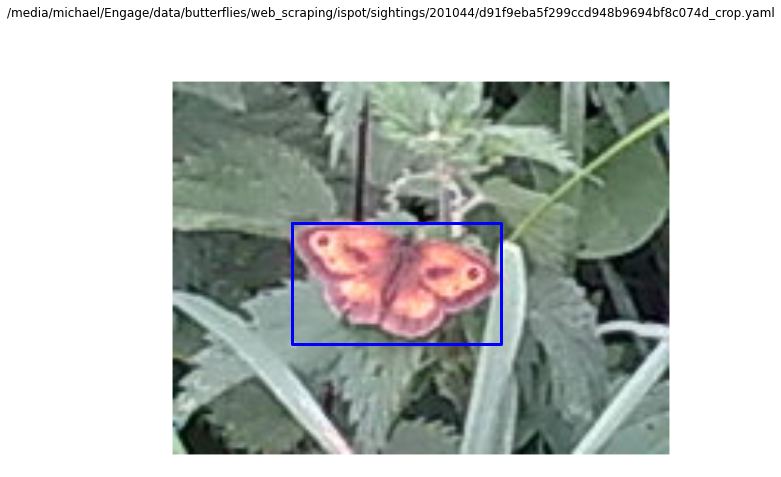

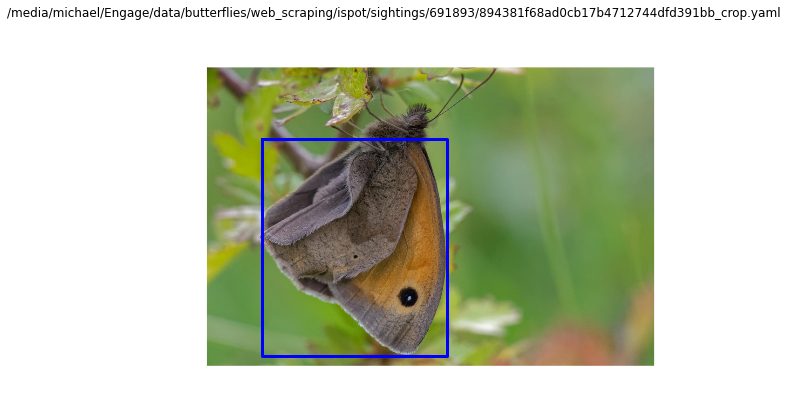

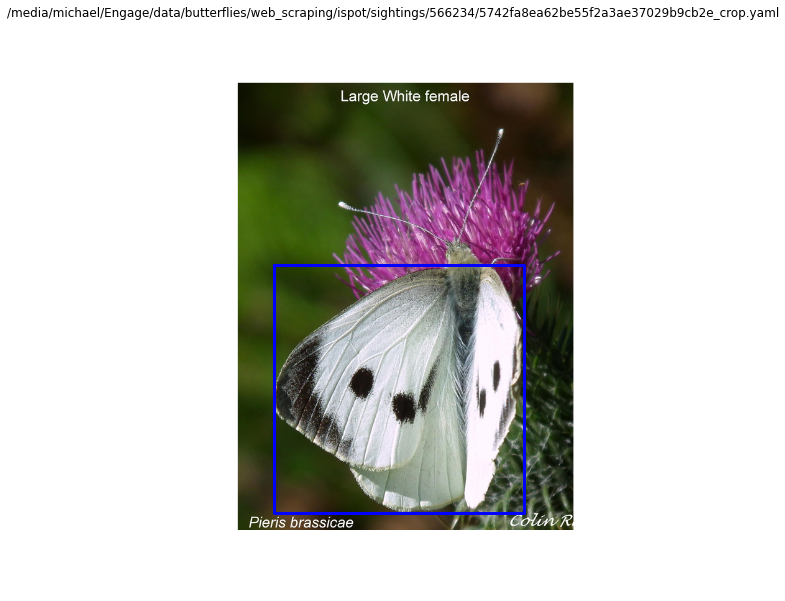

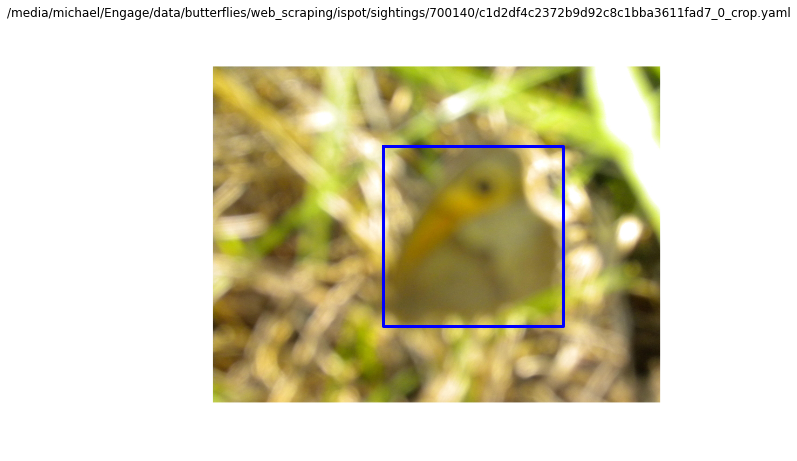

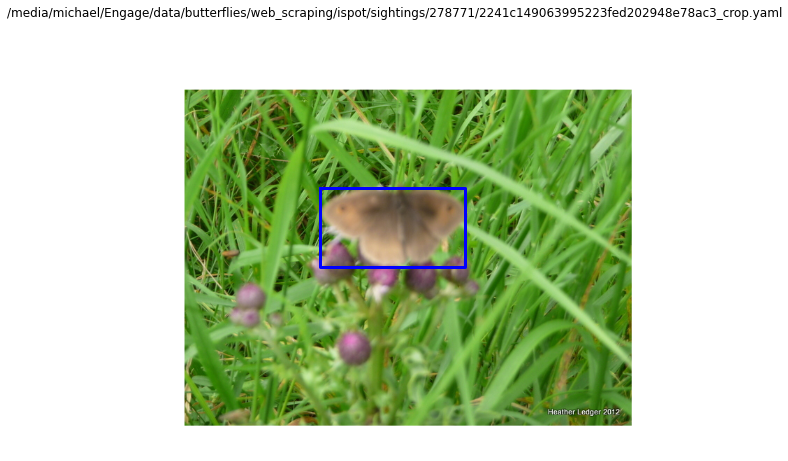

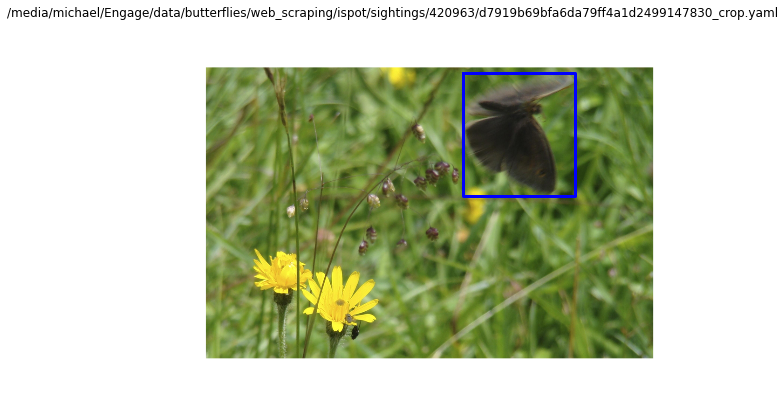

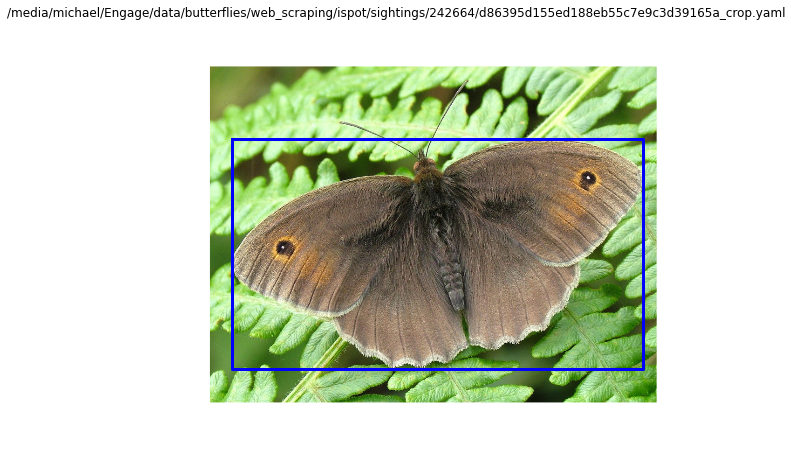

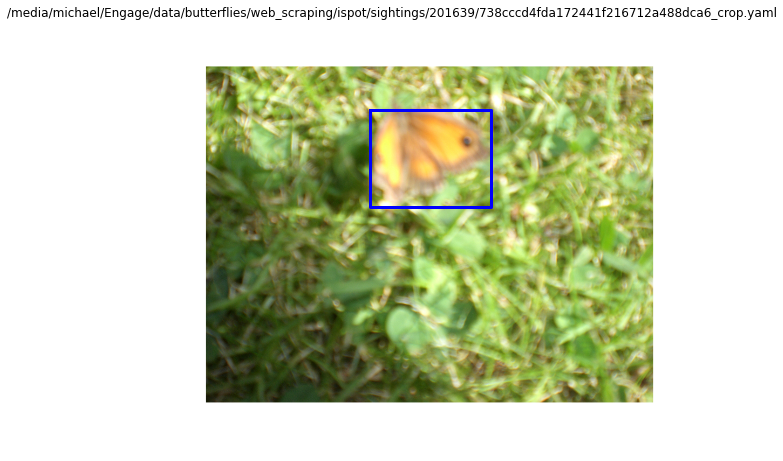

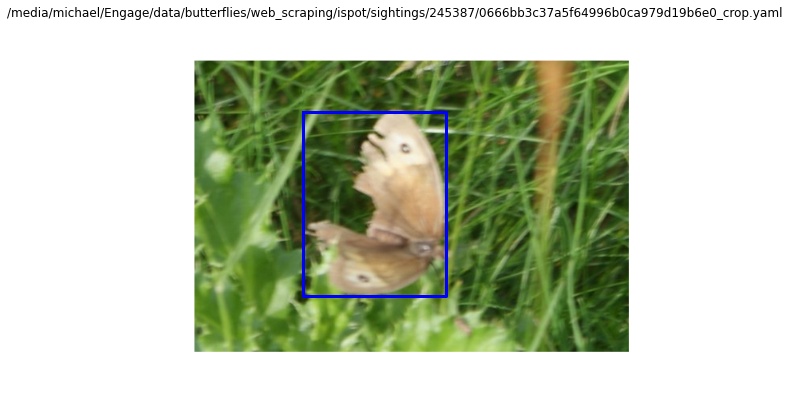

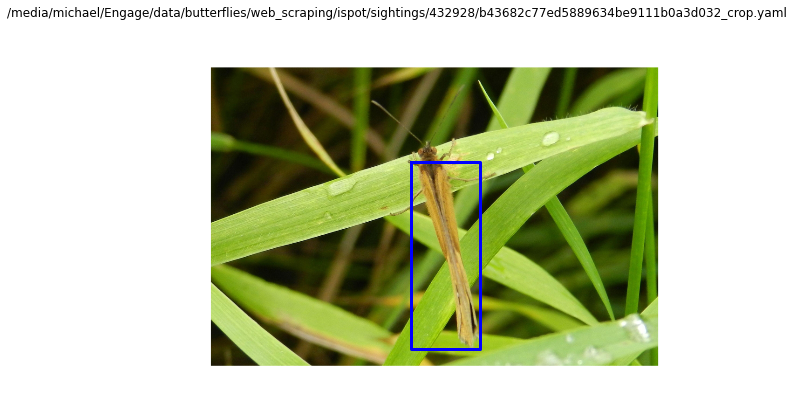

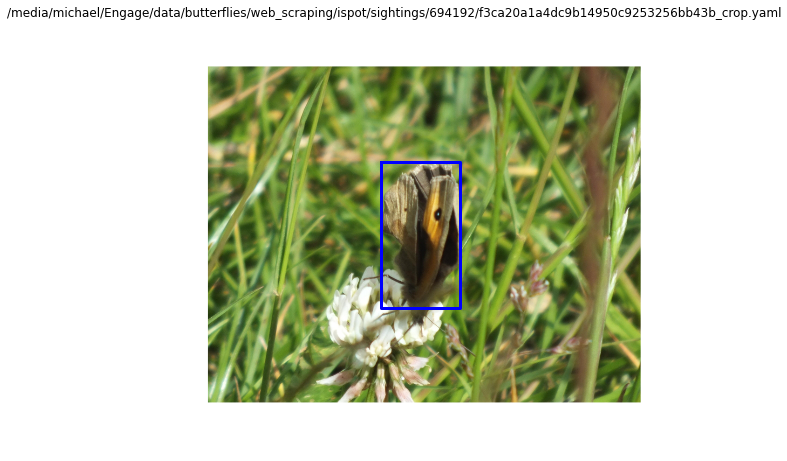

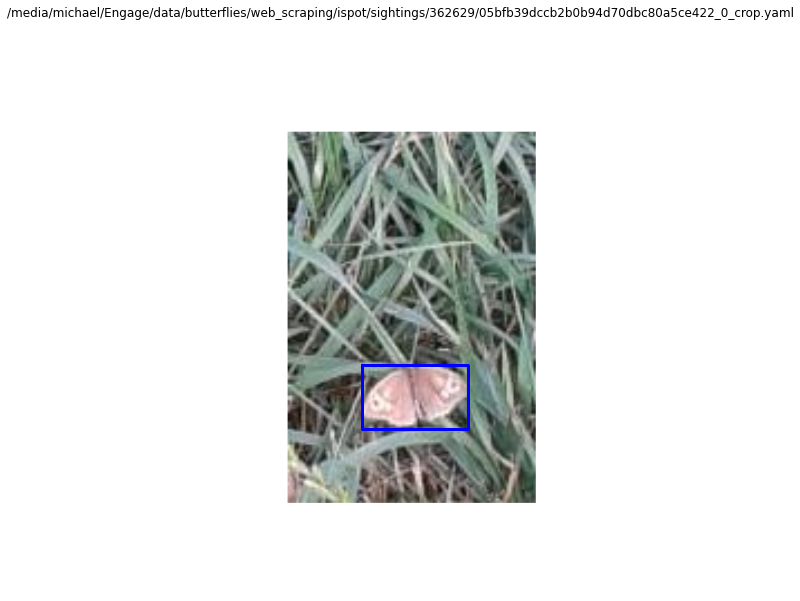

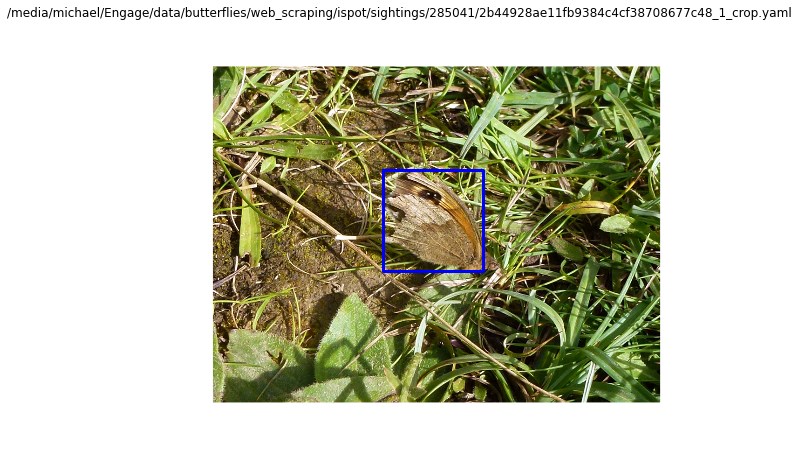

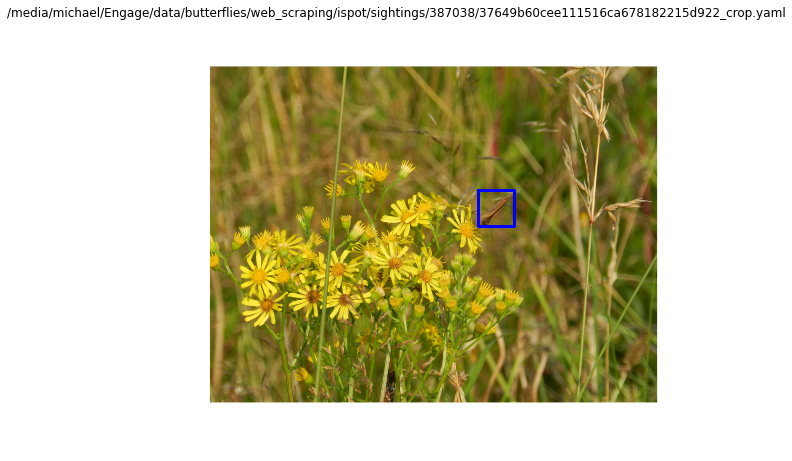

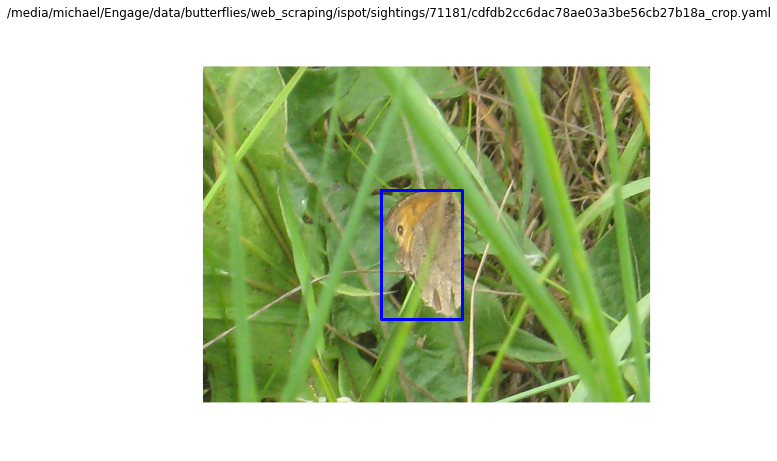

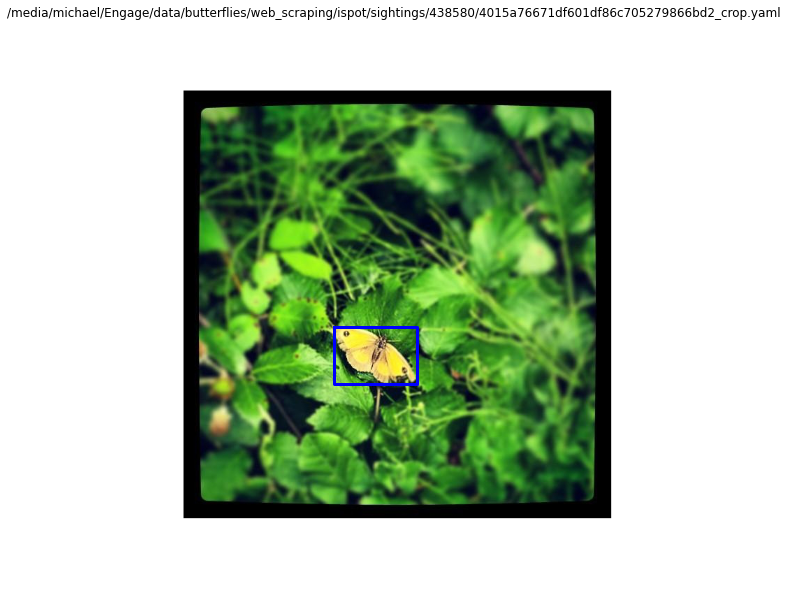

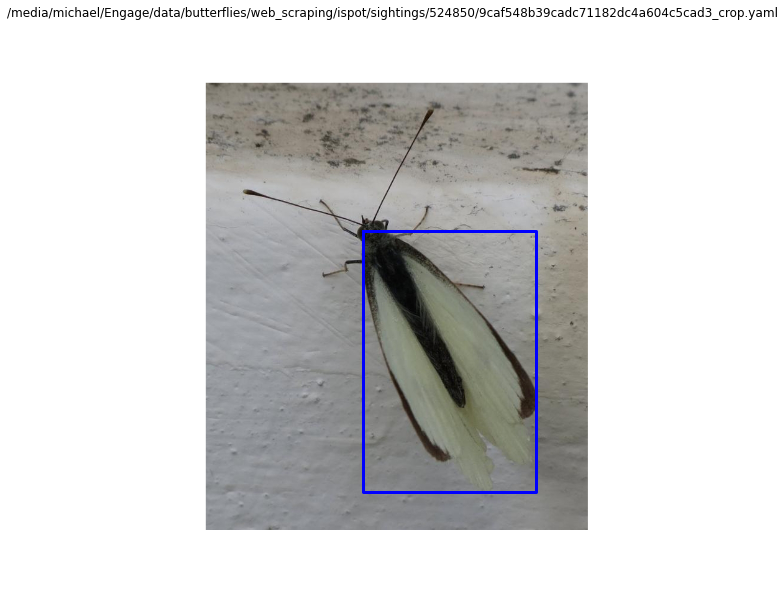

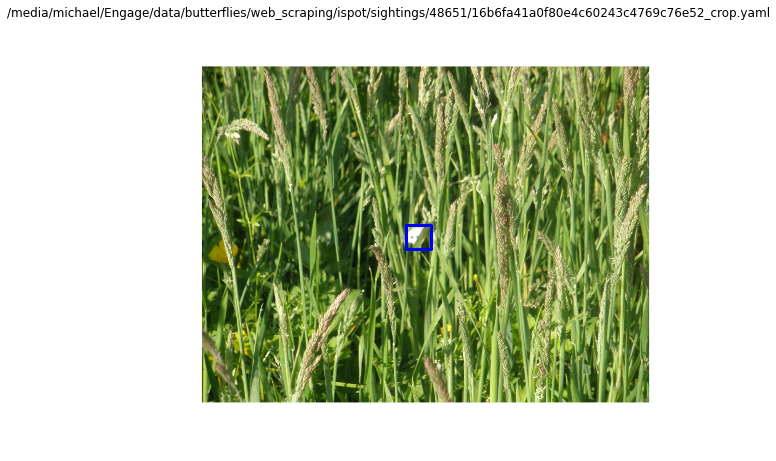

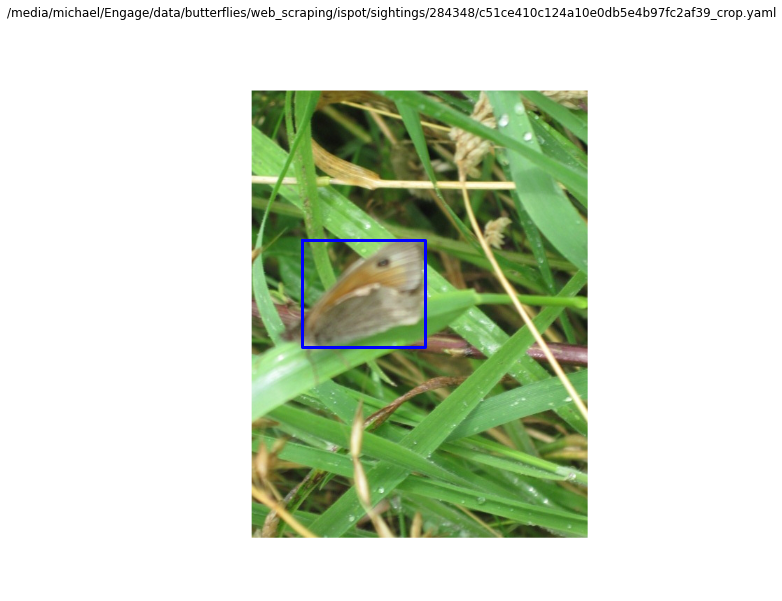

In [40]:
import os
num_plotted = 0

for sighting_id, name, fname in butterflies:
    
    crop_path = data_dir + sighting_id + '/' + fname.replace('.jpg', '_crop.yaml')
    
    if 'yaml' not in crop_path:
        continue
        
    if os.path.exists(crop_path):

        crop = yaml.load(open(crop_path))

        if 'notes' not in crop or len(crop['notes'])  < 4:
            continue

        im = imread(data_dir + sighting_id + '/' + fname)
        plt.figure(figsize=(10, 10))
        plt.imshow(im)
        plt.axis('off')
        
        crop = crop['crop']
        
        plt.plot([crop['x'], 
                  crop['x'] + crop['width'], 
                  crop['x'] + crop['width'], 
                  crop['x'],
                  crop['x']],
                 [crop['y'], 
                  crop['y'], 
                  crop['y'] + crop['height'], 
                  crop['y'] + crop['height'],
                  crop['y']],
                linewidth=3)

        plt.title(crop_path)
        
        num_plotted += 1
#         if num_plotted >= 40:
#             break
    